# Model from Holly 1989 version with other dimensions

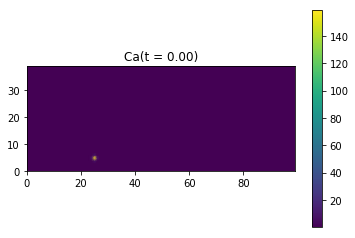

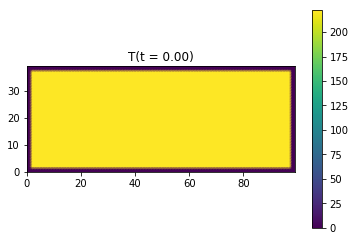

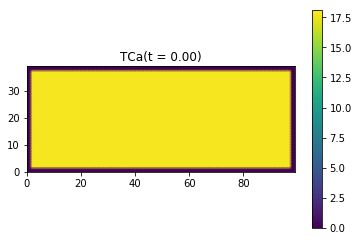

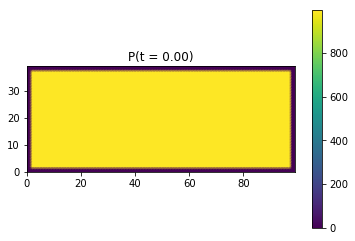

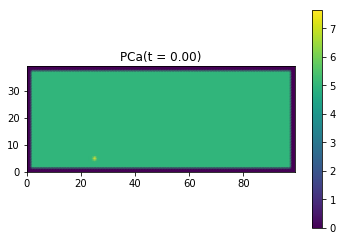

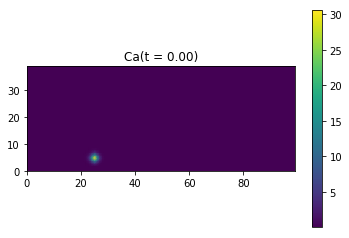

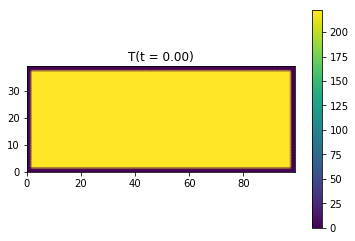

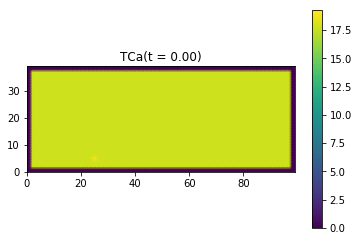

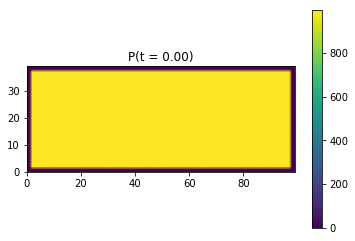

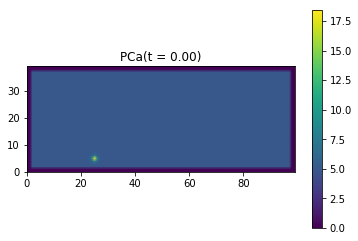

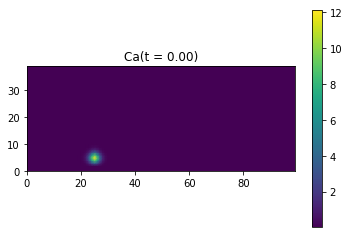

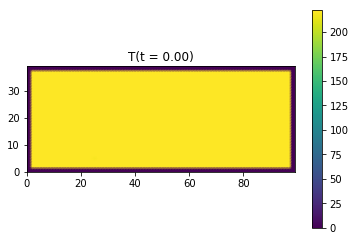

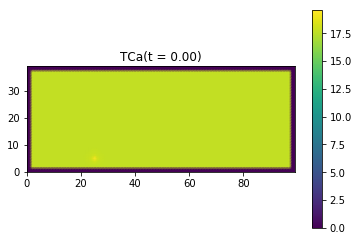

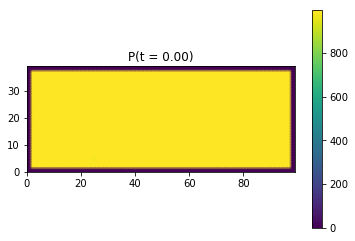

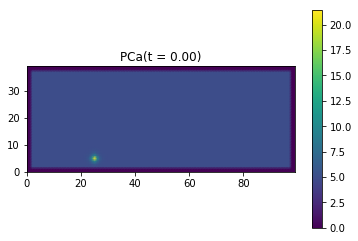

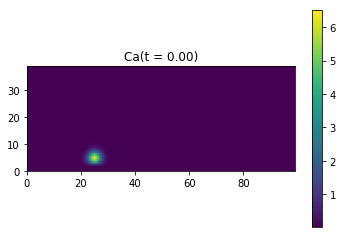

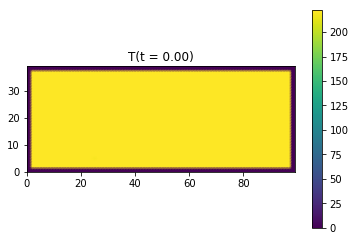

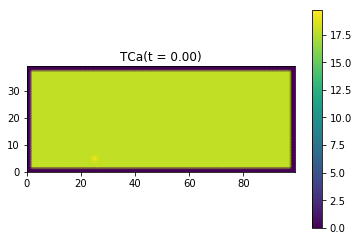

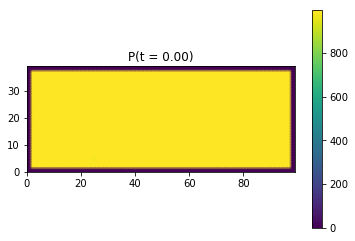

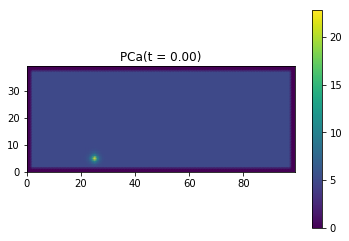

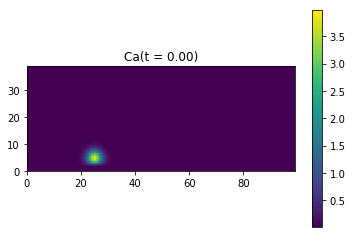

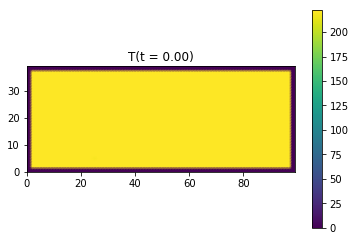

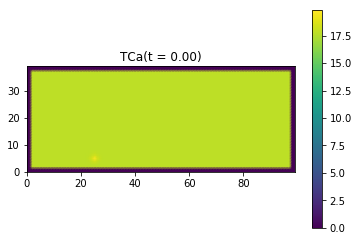

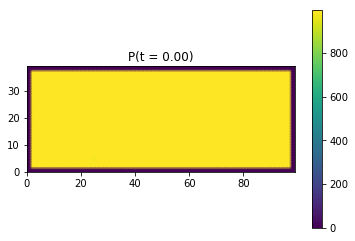

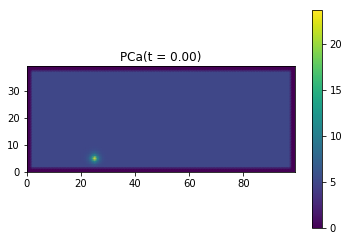

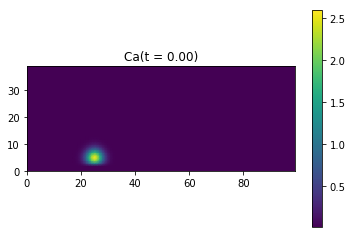

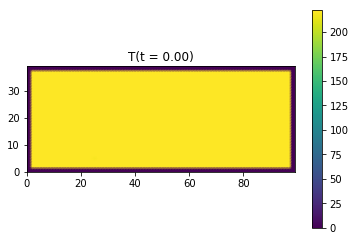

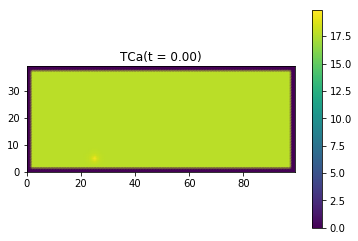

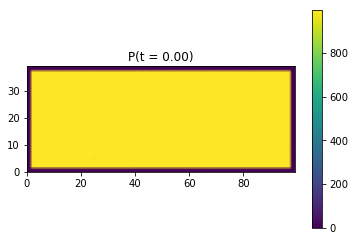

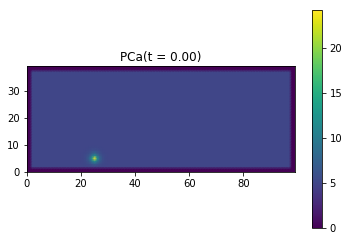

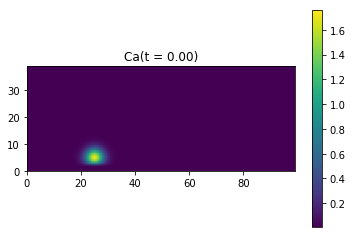

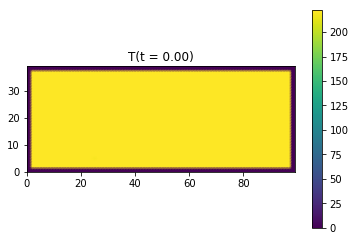

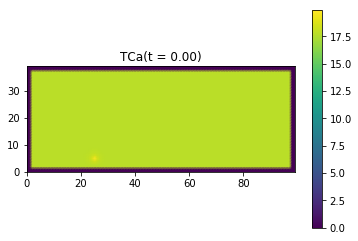

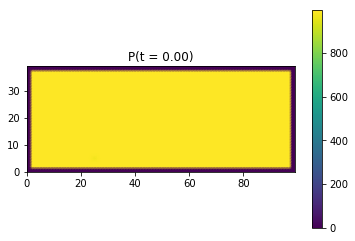

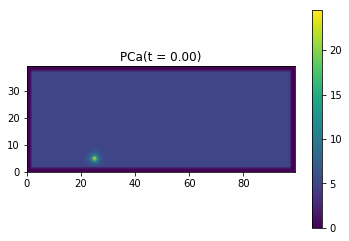

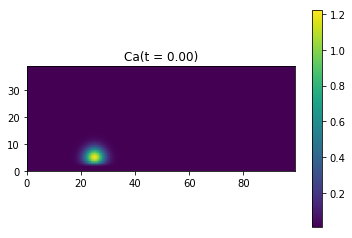

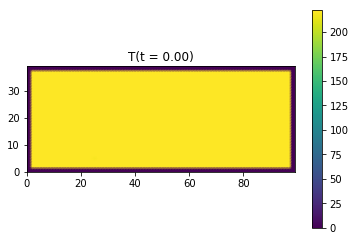

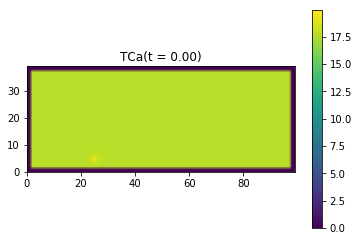

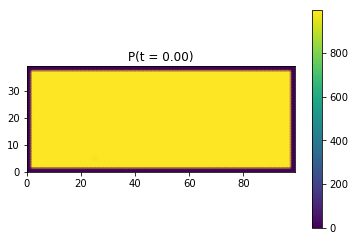

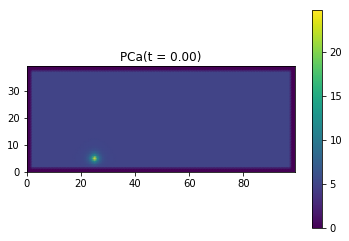

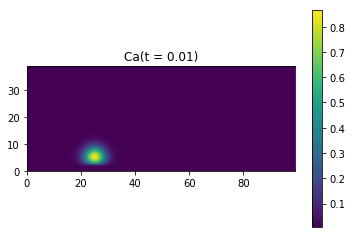

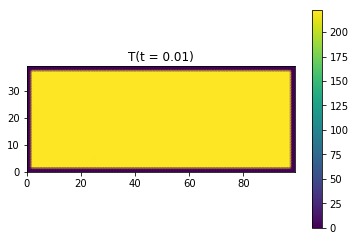

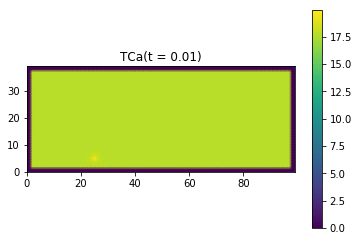

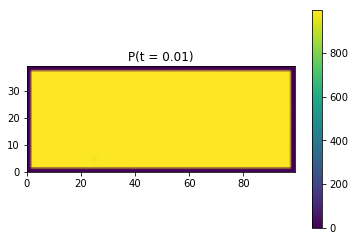

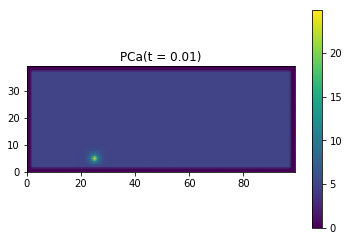

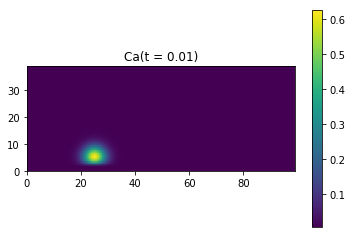

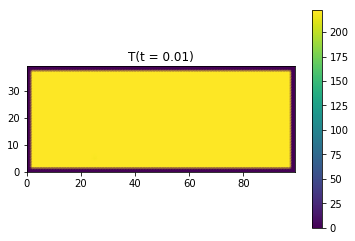

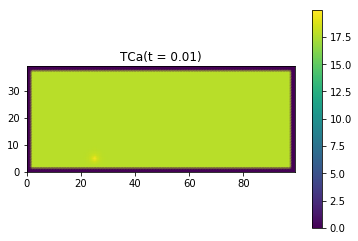

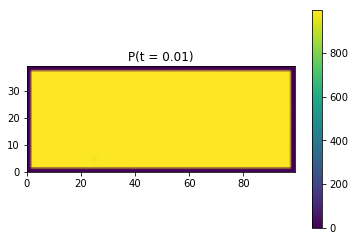

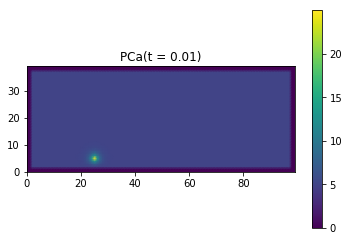

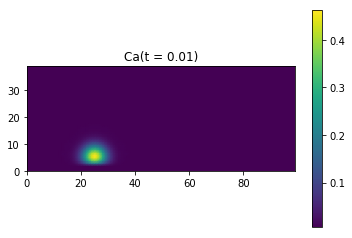

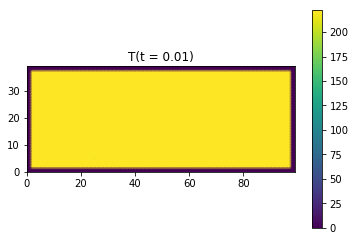

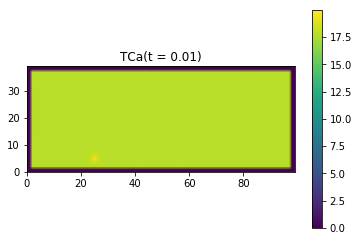

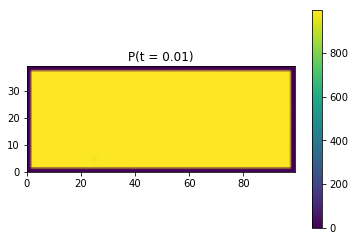

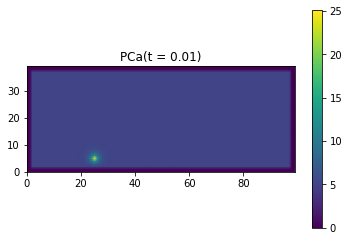

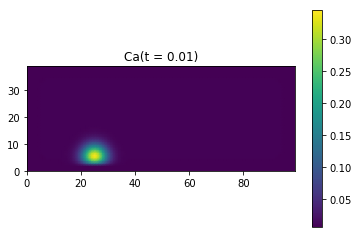

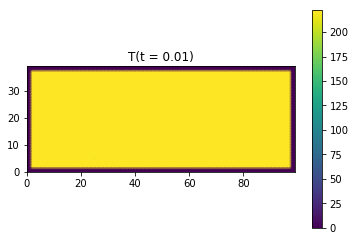

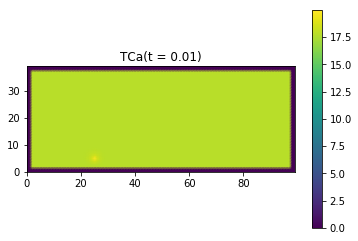

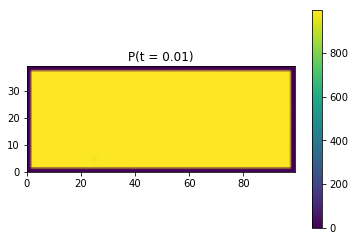

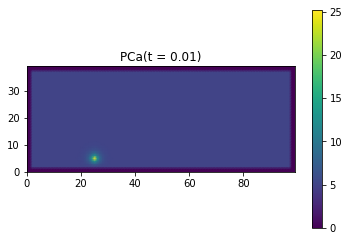

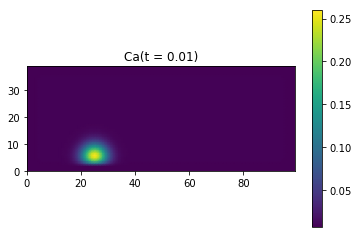

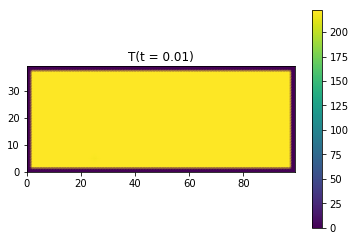

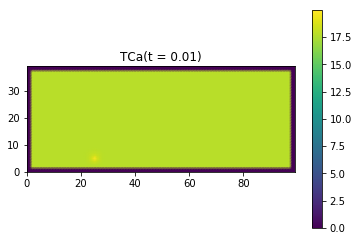

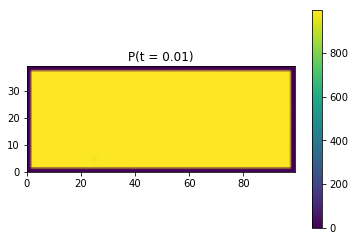

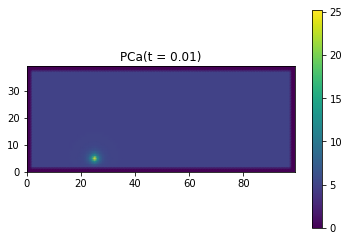

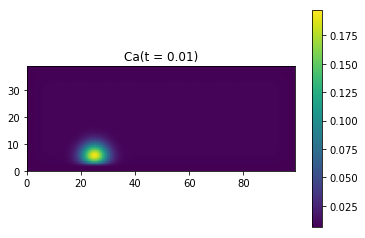

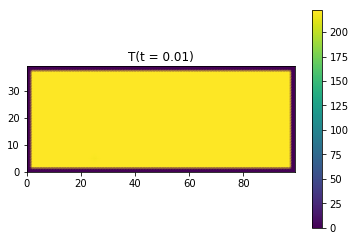

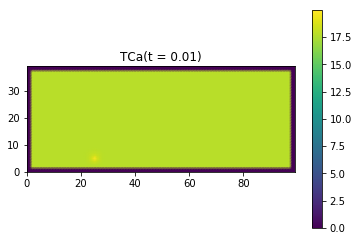

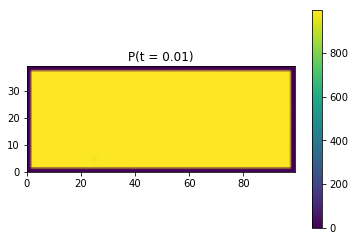

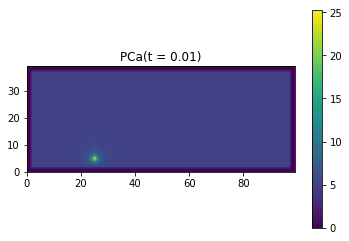

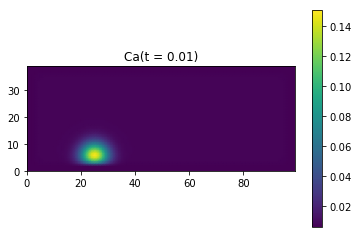

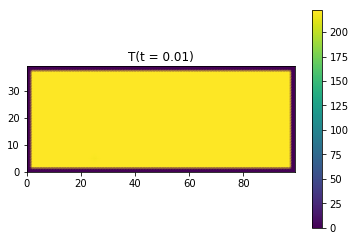

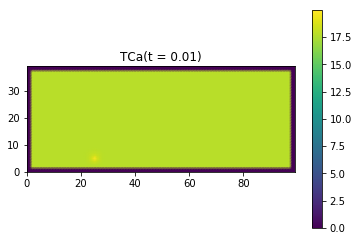

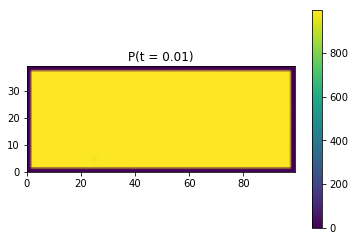

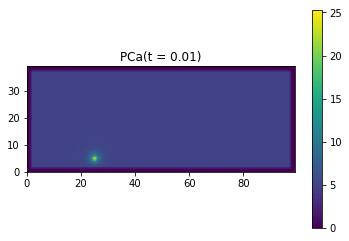

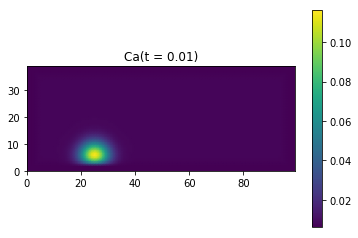

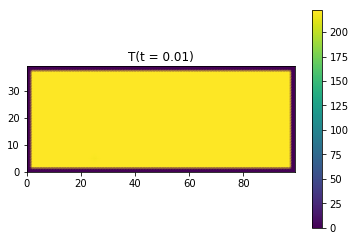

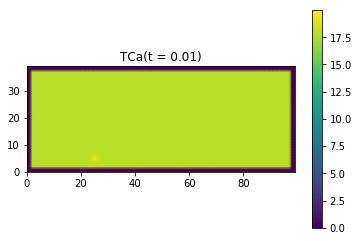

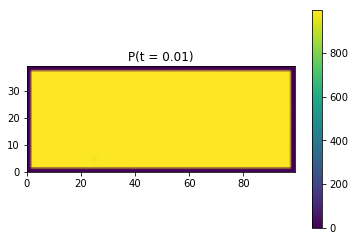

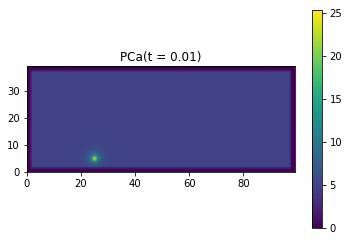

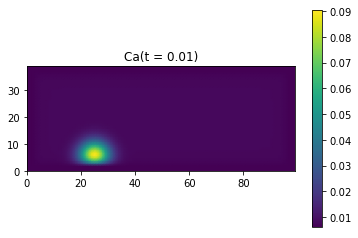

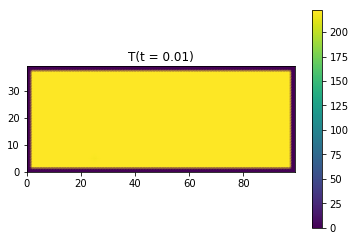

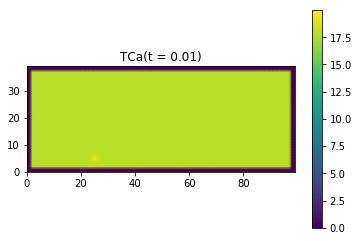

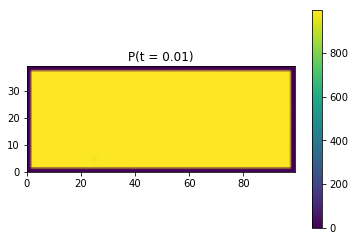

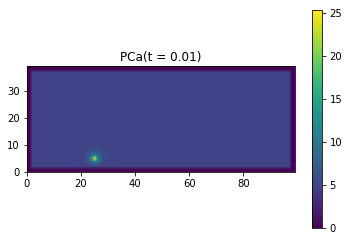

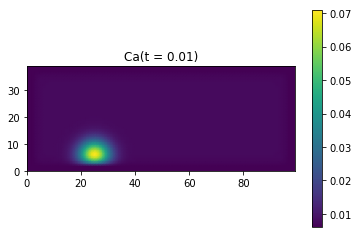

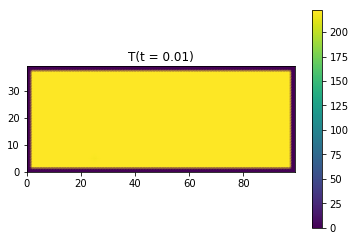

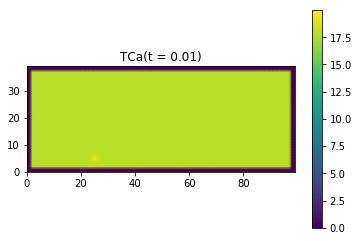

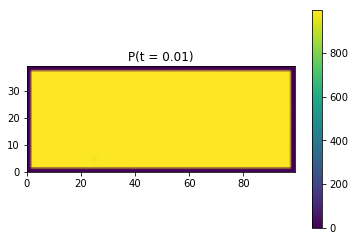

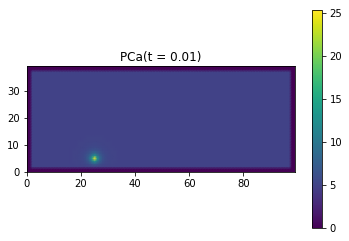

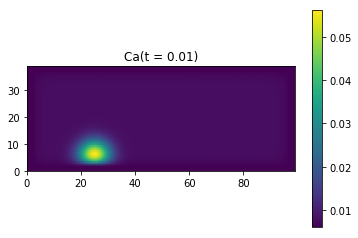

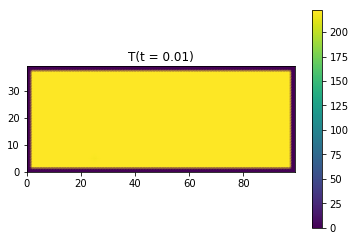

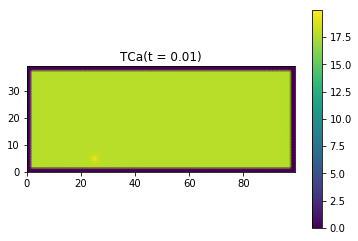

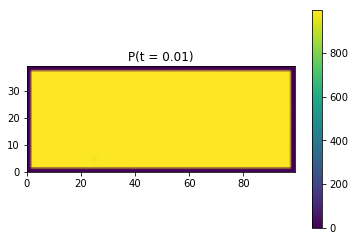

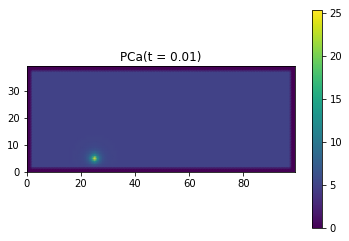

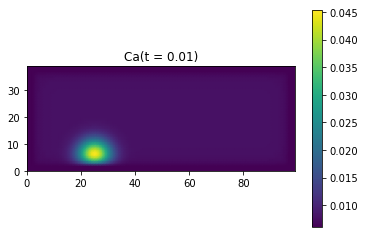

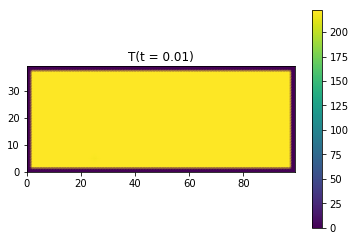

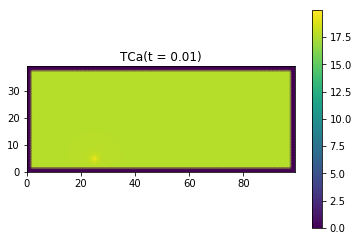

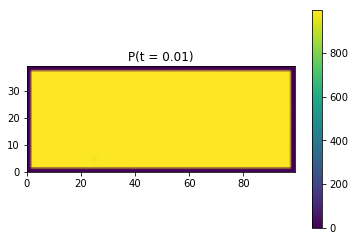

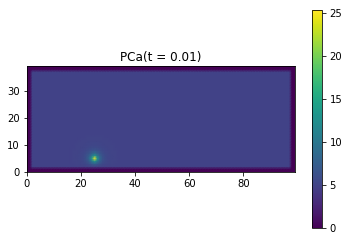

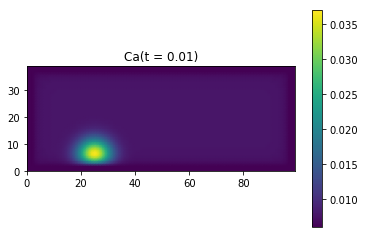

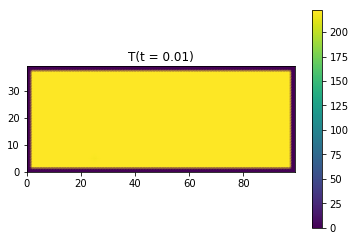

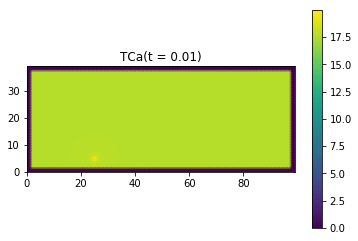

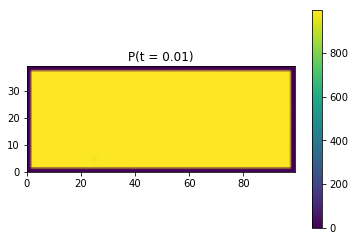

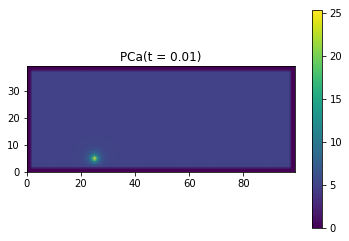

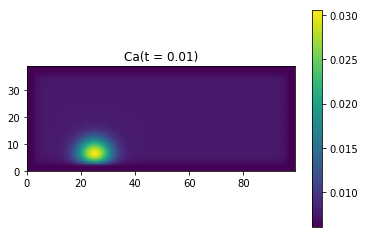

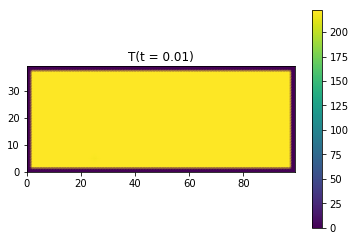

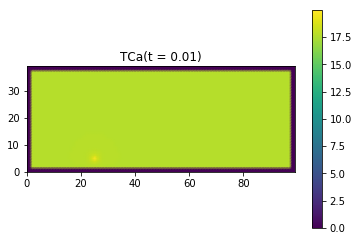

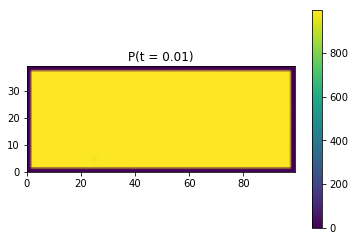

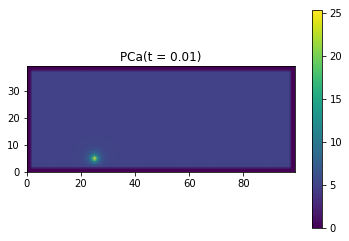

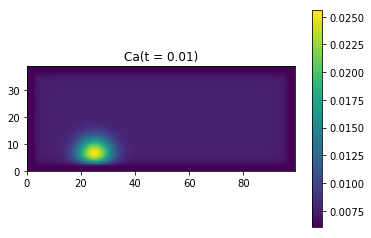

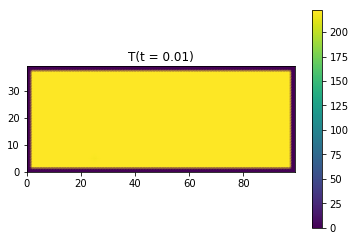

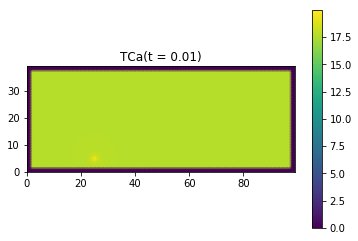

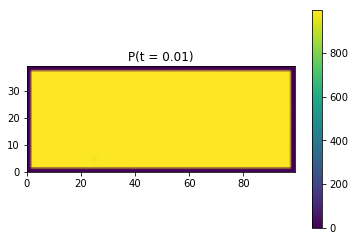

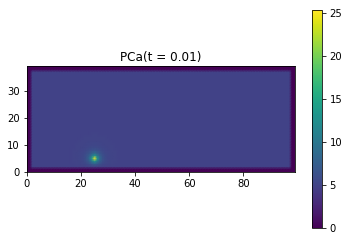

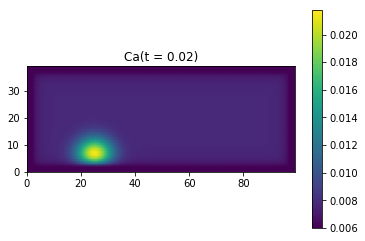

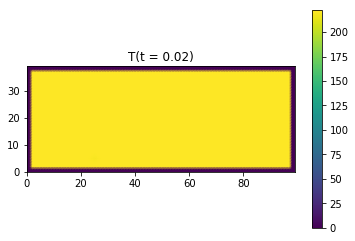

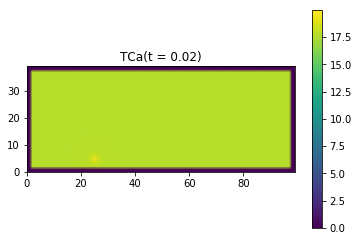

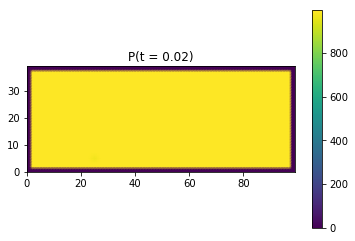

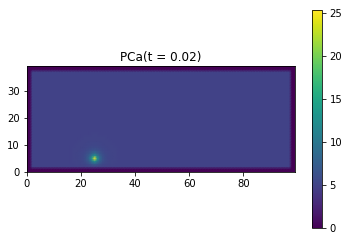

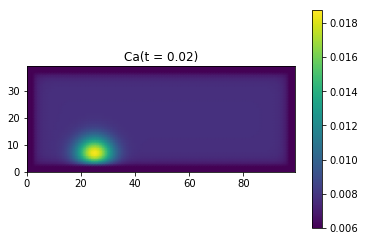

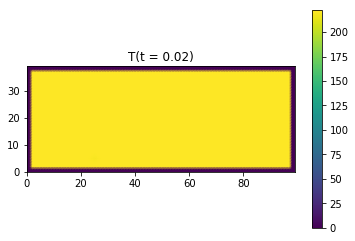

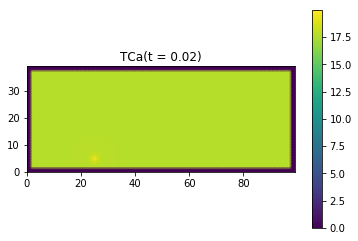

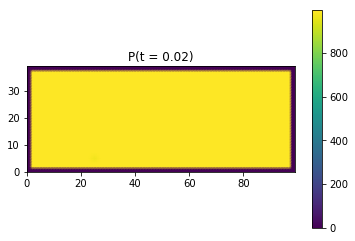

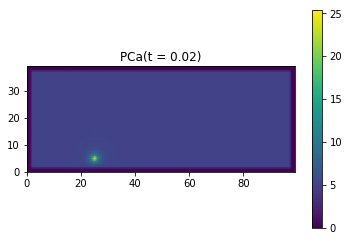

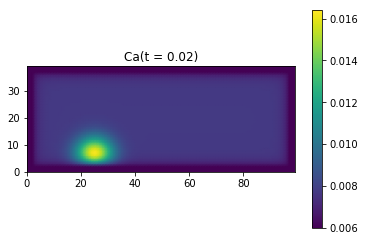

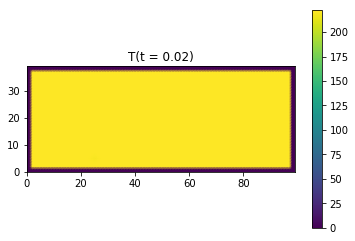

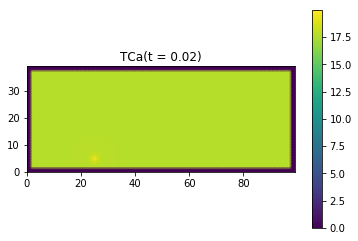

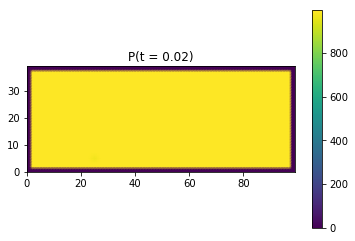

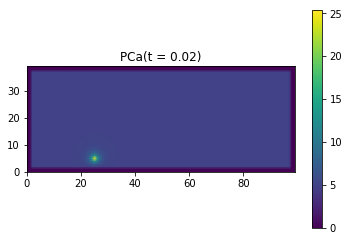

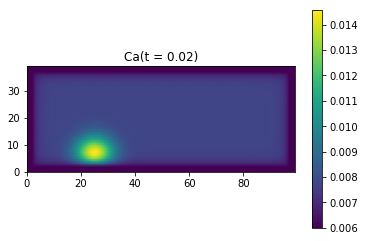

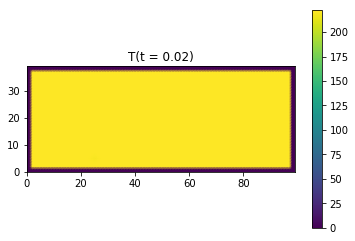

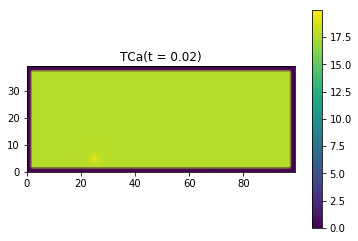

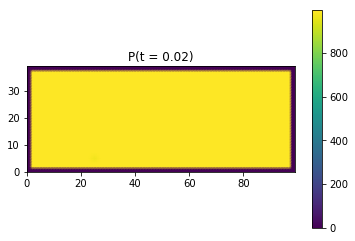

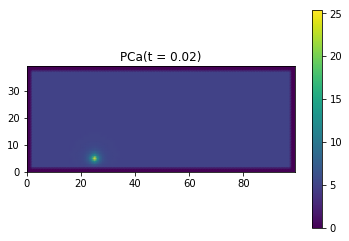

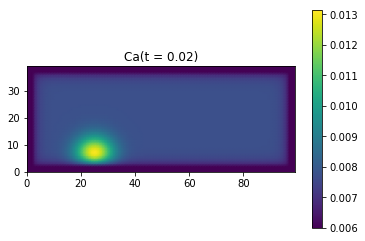

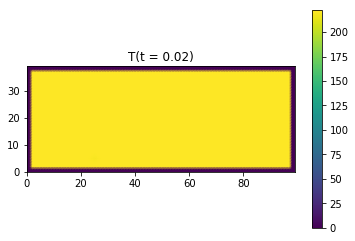

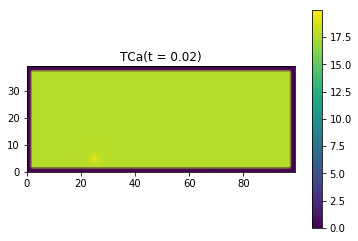

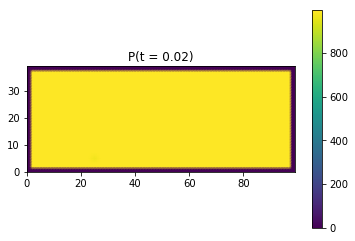

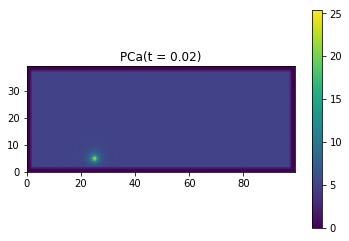

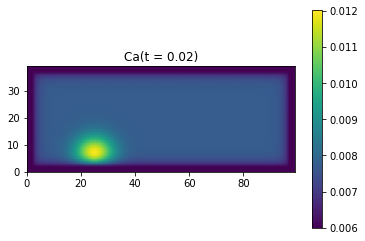

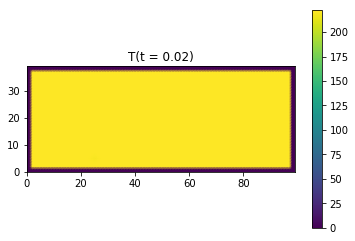

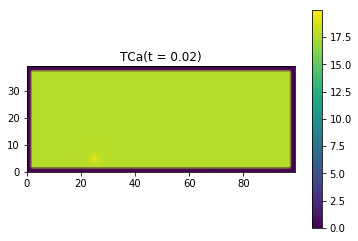

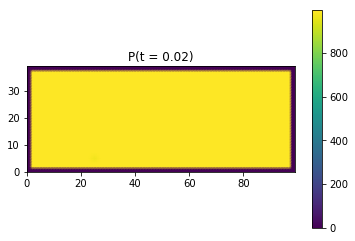

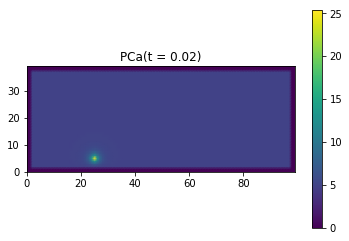

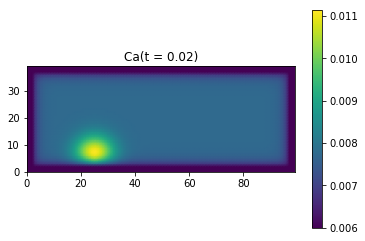

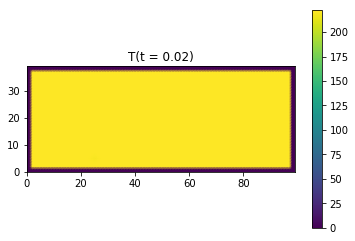

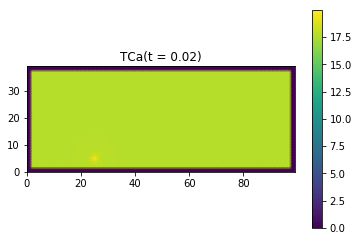

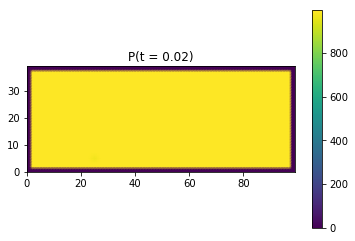

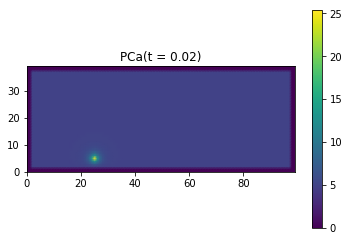

In [8]:
# -*- coding: utf-8 -*-
% matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
from random import randint
import matplotlib.animation as animation
#time and space
Lx=0.4
Ly=1
Ny=100
Nx=40
dy=Ly/Ny
dx = Lx/Nx  # space step
D=0.07
k=1
NT=300
T = 0.02 # total time
dt= T/NT 
n = int(T/dt)
xx = np.linspace(0,Lx,Nx)
yy = np.linspace(0,Ly,Ny)

# kinetics factors data from Holly paper 1989
kton=0.12 #µmol-1 l ms-1
ktoff=0.12 #ms-1
kpon=0.25 #µmol-1 l ms-1
kpoff= 0.001 #ms-1


#All spieces matrices
Ca = np.zeros((Nx, Ny))
T= np.zeros((Nx, Ny))
TCa= np.zeros((Nx, Ny))
P= np.zeros((Nx, Ny))
PCa= np.zeros((Nx, Ny))
# All spiecies start with a uniform concentration exept Ca
T[2:-2,2:-2]=222.2
TCa[2:-2,2:-2]=17.8
P[2:-2,2:-2]=995
PCa[2:-2,2:-2]=5
Ca[:,:]= 0.006 # concentration at rest in MS µmol l-1 
Ca[5,25]=200

def laplacian(Z):
    Zxless = Z[0:-2,1:-1]
    Zyless = Z[1:-1,0:-2]
    Zxplus = Z[2:,1:-1]
    Zyplus = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
def neuman(N):
    N[0,:] = N[1,:]
    N[-1,:] = N[-2,:]
    N[:,0] = N[:,1]
    N[:,-1] =  N[:,-2]
    N[2,:]=N[0,:]
    N[-3,:]=N[-1,:]
    N[:,2]=N[:,0]
    N[:,-3]= N[:,-1]
    # Neumann conditions: derivatives at the edges
    # are null.
    return N
fig = plt.figure()
ims = []  
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of N
    deltaCa = laplacian(Ca)
    # We take the values of N inside the grid.
    Cai = Ca[1:-1,1:-1]
    Ti=T[1:-1,1:-1]
    TCai=TCa[1:-1,1:-1]
    Pi=P[1:-1,1:-1]
    PCai=PCa[1:-1,1:-1]

    # We update the variables.
    Ca[1:-1,1:-1] =  Cai + dt * (ktoff*TCa[1:-1,1:-1]-kton*Ca[1:-1,1:-1]*T[1:-1,1:-1]+kpoff*PCa[1:-1,1:-1]-kpon*Ca[1:-1,1:-1]*P[1:-1,1:-1]+ D*deltaCa )
    T[1:-1,1:-1]=Ti+dt*(ktoff*TCa[1:-1,1:-1]-kton*Ca[1:-1,1:-1]*Ti)
    TCa[1:-1,1:-1]=TCai+dt*(kton*Ca[1:-1,1:-1]*Ti-ktoff*TCai)
    P[1:-1,1:-1]=Pi+dt*(kpoff*PCa[1:-1,1:-1]-kpon*Ca[1:-1,1:-1]*Pi)
    PCa[1:-1,1:-1]=PCai+dt*(kpon*Ca[1:-1,1:-1]*Pi-kpoff*PCai)
    neuman(Ca)  
    # Neumann conditions: derivatives at the edges
    # are null.
    if (i%10 == 0):
        plotlabel = "Ca(t = %1.2f)" %(i * dt)
        plt.pcolormesh(Ca, shading="gouraud")
        plt.colorbar()
        plt.title(plotlabel)
        plt.axis('image')
        plt.show()
        #im=plt.imshow(Ca, animated=True)
        #ims.append([im])
        
    
        plt.pcolormesh(T , shading="gouraud")
        plt.colorbar()
        plt.title('T(t = %1.2f)' %(i * dt))
        plt.axis('image')
        plt.show()
        
        
        plt.pcolormesh(TCa, shading="gouraud" )
        plt.colorbar()
        plt.title('TCa(t = %1.2f)' %(i * dt))
        plt.axis('image')
        plt.show()
        
        
        plt.pcolormesh(P, shading="gouraud")
        plt.colorbar()
        plt.title('P(t = %1.2f)' %(i * dt))
        plt.axis('image')
        plt.show()
        
       
        plt.pcolormesh(PCa, shading="gouraud")
        plt.colorbar()
        plt.title('PCa(t = %1.2f)' %(i * dt))
        plt.axis('image')
        plt.show() 
#plt.imshow(N, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
#plt.xticks([]); plt.yticks([]);
"""plotlabel = "t = %1.2f" %(i * dt)
plt.pcolormesh(Ca, shading="gouraud")
plt.title('Ca')
plt.axis('image')
im=plt.imshow(Ca, animated=True)
ims.append([im])"""
ani=animation.ArtistAnimation(fig, ims, interval=10, blit=True,repeat_delay=10) 
ani.save('CAdiffnotsquare.mp4', fps=10, writer="avconv", codec="libx264")

# Model with the SR

between the mofibrilar and the sarcplasmic reticulum and Tc there is a membrane with a ion channel creat by a enzyme with the following equation:
$$
\frac{ \partial [Cms]}{\partial t}= -K_{on}[Cms]([E]+[ECa])+K_{1off}[ECa]-K_{2off}[ECa2] \\
\\
\frac{ \partial [Cst]}{\partial t}= 2K_{0}[ECa2] \\
\frac{ \partial [ECa]}{\partial t}= K_{on}[Cms]([E]-[ECa])-K_{1off}[ECa]+K_{2off}[ECa2] \\
\frac{ \partial [ECa2]}{\partial t}= K_{on}[Cms][ECa]-(K_{2off}+K_{t0})[ECa2] \\
$$
we define: $[E]=[ECa]=[ECa2]=34 \mu mol.l^{-1}$ and it's uniformly distributed\\
\\
In the reticulum sarcoplasmic we just consider the diffusion term: \\
$$
\frac{ \partial [Ca]}{\partial t}= D(\bigtriangledown ^{2}Ca) \\
$$
with the same coef that in the water $ D=0.007nmm^{2}s^{-1} $


In [ ]:
# -*- coding: utf-8 -*-
% matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
from random import randint
import matplotlib.animation as animation
#time and space
Lx=0.11
Ly=0.11
Ny=30
Nx=30
dy=Ly/Ny
dx = Lx/Nx  # space step
D=0.07
k=1
NT=1000000
T = 0.1 # total time
dt= T/NT 
n = int(T/dt)
xx = np.linspace(0,Lx,Nx)
yy = np.linspace(0,Ly,Ny)
fsr=int(Nx/4)  # point where there is the separation between SR and MS
fms=fsr+2
# kinetics factors data from Holly paper 1989
kton=0.12 #µmol-1 l ms-1
ktoff=0.12 #ms-1
kpon=0.25 #µmol-1 l ms-1
kpoff= 0.001 #ms-1


#All spieces matrices for MS
Ca = np.zeros((Nx, Ny))
T= np.zeros((Nx, Ny))
TCa= np.zeros((Nx, Ny))
P= np.zeros((Nx, Ny))
PCa= np.zeros((Nx, Ny))
# All spiecies start with a uniform concentration exept Ca
T[(fms+1):-2,:]=222.2
TCa[(fms+1):-2,:]=17.8
P[(fms+1):-2,:]=995
PCa[(fms+1):-2,:]=5
Ca[(fms+1):-2,:]= 0.006 # concentration at rest in MS µmol l-1 


# The border composed by the atp enzyme E is view like a vector
E=np.zeros((Ny))
ECa=np.zeros((Ny))
ECa2=np.zeros((Ny))
Keon=0.35
K1off=0.4
K2off=0.025
Kto=0.005
Le=100
E[:]=Le
ECa[:]=0
ECa2[:]=0 #initial condition

Dsr=0.007

def laplacianMs(Z):
    Zxless = Z[(fms):-2,1:-1]
    Zyless = Z[(fms)+1:-1,0:-2]
    Zxplus = Z[(fms)+2:,1:-1]
    Zyplus = Z[(fms)+1:-1,2:]
    Zcenter = Z[(fms)+1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
def laplacianSR(Z):
    Zxless = Z[0:fsr-2,1:-1]
    Zyless = Z[1:fsr-1,0:-2]
    Zxplus = Z[2:fsr,1:-1]
    Zyplus = Z[1:fsr-1,2:]
    Zcenter = Z[1:fsr-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
def neumanMS(N):
    N[f,:] = N[2,:]
    N[-1,:] = N[-3,:]
    N[:,0] = N[:,2]
    N[:,-1] =  N[:,-3]
    N[2,:]=N[0,:]
    N[-3,:]=N[-1,:]
    N[:,2]=N[:,0]
    N[:,-3]= N[:,-1]
    # Neumann conditions: derivatives at the edges
    # are null.
    return N
def neumanSR(N):
    N[f,:] = N[2,:]
    N[-1,:] = N[-3,:]
    N[:,0] = N[:,2]
    N[:,-1] =  N[:,-3]
    N[2,:]=N[0,:]
    N[-3,:]=N[-1,:]
    N[:,2]=N[:,0]
    N[:,-3]= N[:,-1]
    # Neumann conditions: derivatives at the edges
    # are null.
    return N
fig = plt.figure()
ims = []  
# We simulate the PDE with the finite difference method.
for i in range(n):
    
    deltaCa = laplacianMs(Ca)
    # MS part
    Cai = Ca[(fms):-2,1:-1]
    Ti=T[fms:-2,1:-1]
    TCai=TCa[fms:-2,1:-1]
    Pi=P[fms:-2,1:-1]
    PCai=PCa[fms:-2,1:-1] 
    # We update the variables.
    Ca[(fms):-2,1:-1] =  Cai + dt * (ktoff*TCa[(fms):-2,1:-1]-kton*Cai*T[(fms):-2,1:-1] \
                                 +kpoff*PCa[(fms):-2,1:-1]-kpon*Cai*P[(fms):-2,1:-1]+ D*deltaCa )
    T[fms:-2,1:-1]=Ti+dt*(ktoff*TCa[fms:-2,1:-1]-kton*Ca[fms:-2,1:-1]*Ti)
    TCa[fms:-2,1:-1]=TCai+dt*(kton*Ca[fms:-2,1:-1]*Ti-ktoff*TCai)
    P[fms:-2,1:-1]=Pi+dt*(kpoff*PCa[fms:-2,1:-1]-kpon*Ca[fms:-2,1:-1]*Pi)
    PCa[fms:-2,1:-1]=PCai+dt*(kpon*Ca[fms:-2,1:-1]*Pi-kpoff*PCai)
    
    
    #Membrane part between SR and MS
    Cms=Ca[fms,1:-1]
    Ca[fms,1:-1]=Cms+dt*(-Keon*Cms*(E[1:-1]+ECa[1:-1])+K1off*ECa[1:-1]+K2off*ECa2[1:-1])
    ECa[1:-1]=ECa[1:-1]+dt*(Keon*Cms*(E[1:-1]-ECa[1:-1])-K1off*ECa[1:-1]+K2off*ECa2[1:-1])
    ECa2[1:-1]=ECa2[1:-1]+dt*((Keon*Cms*ECa[1:-1])-(K2off+Kto)*ECa2[1:-1])
    E[:]=Le-ECa[:]-ECa2[:]
    Csr=Ca[fsr-1,1:-1]
    Ca[fms-1,1:-1]=Csr+dt*2*Kto*ECa2[1:-1]
    #SR part
    Ca[1:fsr-1,1:-1]=Ca[1:fsr-1,1:-1]+dt*Dsr*laplacianSR(Ca)
    if (n%100 == 0):
        
        plotlabel = "Ca(t = %1.2f)" %(i * dt)
        plt.pcolormesh(Ca )
        plt.colorbar()
        plt.title(plotlabel)
        plt.axis('image')
        plt.show()
        #im = plt.imshow(Ca, animated=True)
        #ims.append([im])
        
        
       
        
#plt.imshow(N, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
#plt.xticks([]); plt.yticks([]);
#ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
#ani.save('hollydiff.mp4', fps=100, writer="avconv", codec="libx264")
